# 278k Emotion Labeled Spotify Songs  
https://www.kaggle.com/datasets/abdullahorzan/moodify-dataset  
- Labels: {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}  


**RESULT**  
Mean accuracy cv: 0.8350875987633115


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Epita/project/DataProject/dataset/278k_labelled_uri.csv')

# Data Preprocessing

### Visualization

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.1      277938 non-null  int64  
 1   Unnamed: 0        277938 non-null  int64  
 2   duration (ms)     277938 non-null  float64
 3   danceability      277938 non-null  float64
 4   energy            277938 non-null  float64
 5   loudness          277938 non-null  float64
 6   speechiness       277938 non-null  float64
 7   acousticness      277938 non-null  float64
 8   instrumentalness  277938 non-null  float64
 9   liveness          277938 non-null  float64
 10  valence           277938 non-null  float64
 11  tempo             277938 non-null  float64
 12  spec_rate         277938 non-null  float64
 13  labels            277938 non-null  int64  
 14  uri               277938 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 31.8+ MB


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
count,277938.000000,277938.000000,2.779380e+05,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05,277938.000000
mean,138968.500000,138968.500000,2.324961e+05,0.552583,0.556866,-10.363654,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,4.754654e-07,1.179101
std,80233.933896,80233.933896,1.171830e+05,0.188905,0.279681,6.672049,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,9.190229e-07,1.021033
min,0.000000,0.000000,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,69484.250000,69484.250000,1.720130e+05,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.531461e-07,0.000000
50%,138968.500000,138968.500000,2.131055e+05,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.345459e-07,1.000000
75%,208452.750000,208452.750000,2.648660e+05,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,4.449937e-07,2.000000
max,277937.000000,277937.000000,3.919895e+06,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05,3.000000


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'duration (ms)', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'spec_rate', 'labels', 'uri'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
uri                 0
dtype: int64

In [ ]:
# Select the relevant features 관련된 특징들만 추출 (그 외는 drop)
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
print('num of features =', len(features))


df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'duration (ms)', 'spec_rate', 'uri'], axis = 1, inplace = True)

num of features = 9


### Outlier Detection

<Axes: >

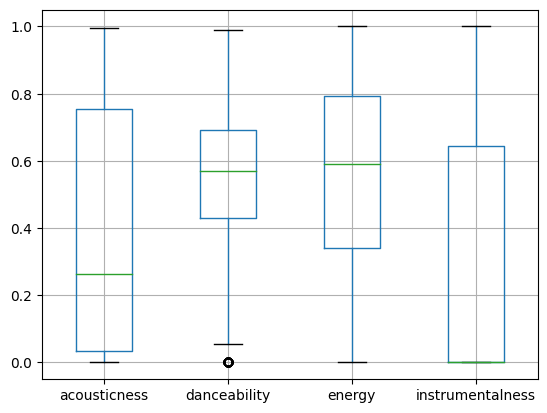

In [ ]:
df.boxplot(column= features[:4])

<Axes: >

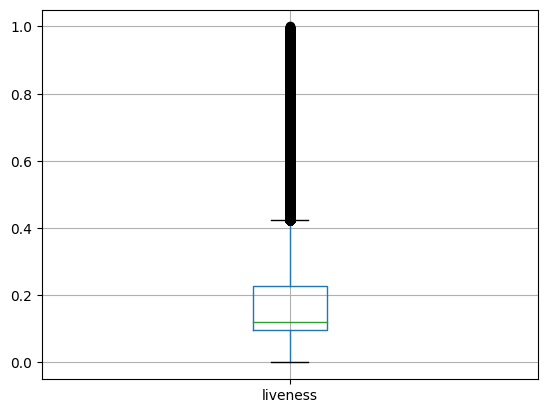

In [ ]:
df.boxplot(column= features[4])

<Axes: >

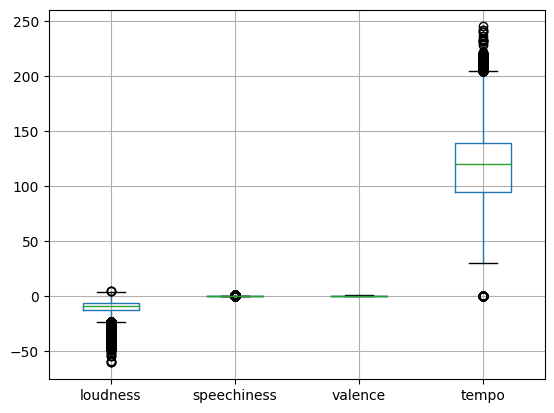

In [ ]:
df.boxplot(column= features[5:])

<Axes: >

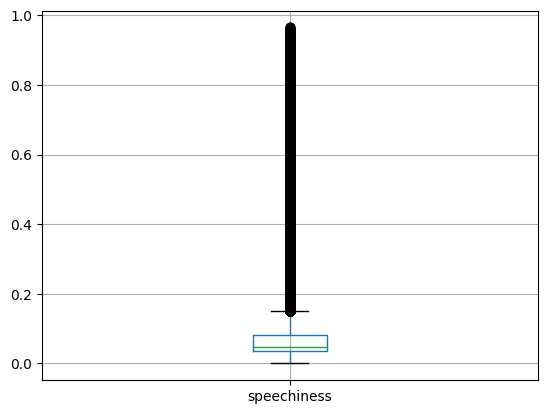

In [ ]:
df.boxplot(column= features[6])

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>, <Axes: >]], dtype=object)

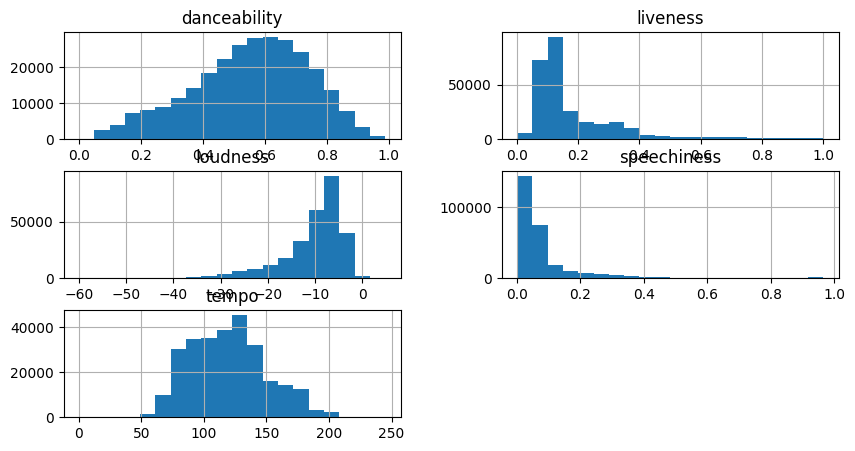

In [ ]:
temp = ['danceability','liveness', 'loudness', 'speechiness', 'tempo']

original_df = df[temp]
original_df.hist(bins=20, figsize=(10,5))

In [ ]:
# 1) Q1, Q3, IQR 정의하기
Q1 = df[temp].quantile(q=0.25)
Q3 = df[temp].quantile(q=0.75)
print("Q1 \n", Q1)
print("\nQ3 \n", Q3)

Q1 
 danceability     0.43100
liveness         0.09620
loudness       -12.74700
speechiness      0.03590
tempo           95.07225
Name: 0.25, dtype: float64

Q3 
 danceability      0.69300
liveness          0.22700
loudness         -5.84200
speechiness       0.08220
tempo           138.86975
Name: 0.75, dtype: float64


IQR = Q3 - Q1   
 1.5 기준

In [ ]:
# 2) 이상치 데이터 제거하기 (이상치가 아닌 데이터만 채택하기)
# temp = ['danceability','liveness', 'loudness', 'speechiness', 'tempo']

IQR = Q3 - Q1
original_df = df
IQR_df = df[(df[temp[0]] <= Q3[temp[0]]+1.5*IQR[temp[0]]) & (df[temp[0]] >= Q1[temp[0]]-1.5*IQR[temp[0]])]

for col in temp:
  if col != 'danceability':
    IQR_df = IQR_df[(IQR_df[col] <= Q3[col]+1.5*IQR[col]) & (IQR_df[col] >= Q1[col]-1.5*IQR[col])]


print('original_df :', len(original_df))
print('IQR_df :', len(IQR_df))
IQR_df.head()

original_df : 277938
IQR_df : 207929


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
1,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1
2,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,1
3,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,0
4,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,1
5,0.572,0.837,-7.876,0.0367,0.0197,0.000000,0.1630,0.627,100.343,1


이상치 제거 잘 되었는지 확인

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'labels'}>, <Axes: >, <Axes: >]],
      dtype=object)

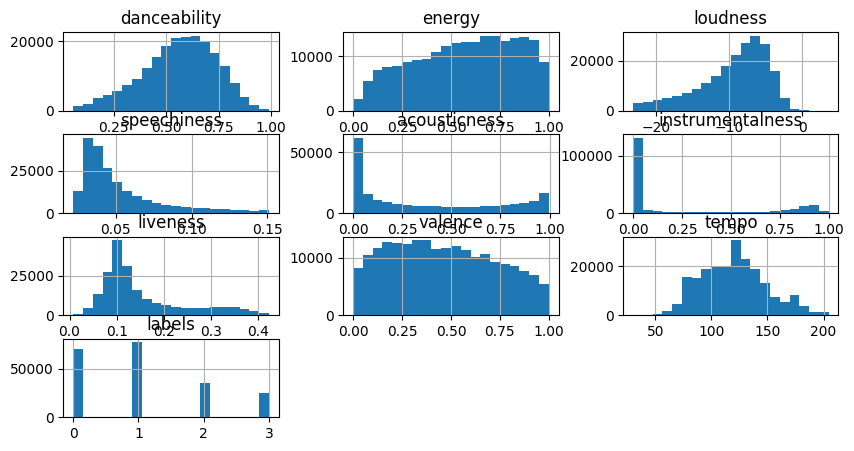

In [ ]:

IQR_df.hist(bins=20, figsize=(10,5))

<Axes: >

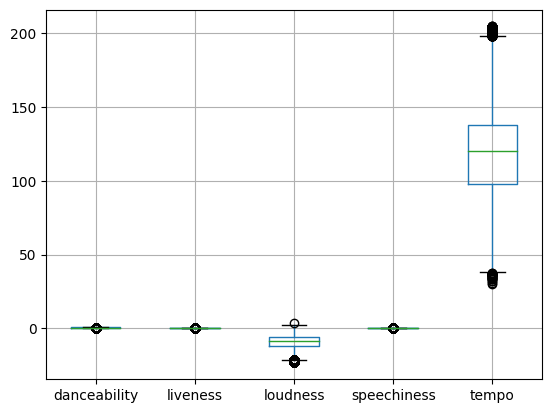

In [ ]:
IQR_df.boxplot(column= temp)

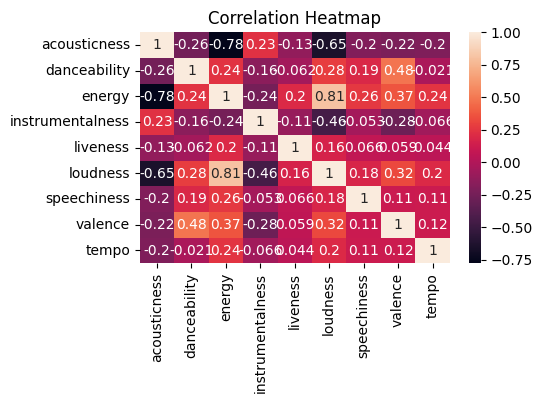

In [ ]:
# Calculate the correlation matrix

corr = IQR_df[features].corr()

plt.figure(figsize=(5, 3))
sns.heatmap(corr, annot=True) ##
plt.title('Correlation Heatmap')
plt.show()

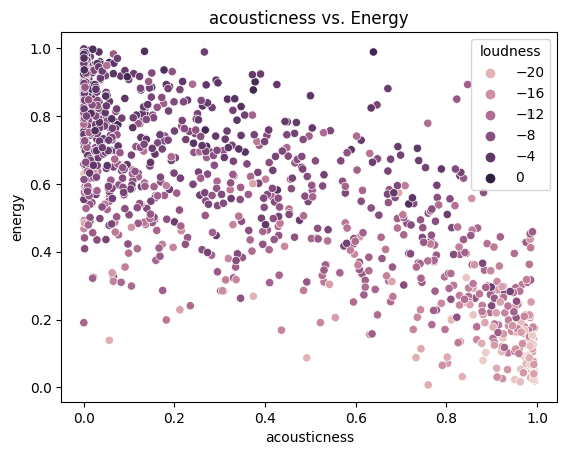

In [ ]:
scatter_data = IQR_df.sample(1000)  # Sample subset of data for scatter plots

# Scatter plot of Danceability vs. Energy
sns.scatterplot(data=scatter_data, x='acousticness', y='energy', hue='loudness')
plt.title('acousticness vs. Energy')
plt.show()

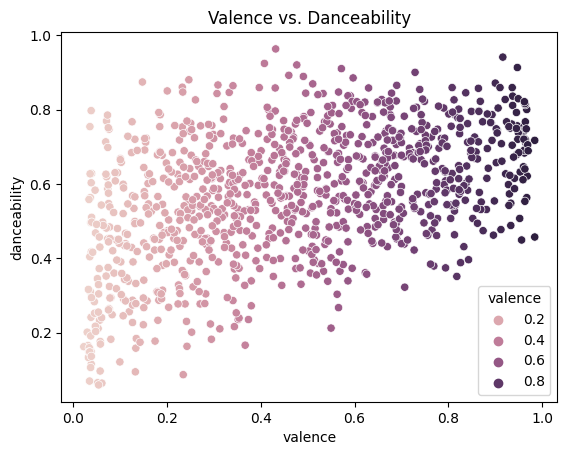

In [ ]:
sns.scatterplot(data=scatter_data, x='valence', y='danceability', hue='valence')
plt.title('Valence vs. Danceability')
plt.show()

In [ ]:
IQR_df.to_csv('new_278k_labelled_uri.csv')

# Split into Train/Test set

In [ ]:
# Update IQR_df as df
df = IQR_df

In [ ]:
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
1,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1
2,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,1
3,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,0
4,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,1
5,0.572,0.837,-7.876,0.0367,0.0197,0.000000,0.1630,0.627,100.343,1


In [ ]:
X = df.iloc[:, :-1] ## duration ~ spec_rate
y = df.iloc[:, -1] ## labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state=42)

X_train.shape, y_train.shape

((145550, 9), (145550,))

# Define  & fit model

k-fold + normalization  
: https://datascience.stackexchange.com/questions/87085/k-fold-cross-validation-and-data-leakage

In [ ]:
# KNN
from sklearn.preprocessing import MinMaxScaler
model = Pipeline([("scaling", MinMaxScaler()), ("modeling", KNeighborsClassifier(n_neighbors=5))]).fit(X_train, y_train)  # ("imputing", SimpleImputer(strategy= "mean")),

cv_scores = cross_val_score(estimator= model, X = X_train, y = y_train, scoring= "accuracy")

In [ ]:
from sklearn import set_config

set_config(display='diagram')
model

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('modeling', KNeighborsClassifier())])

# Prediction

In [ ]:
print(f"Mean accuracy cv: {np.mean(cv_scores)}")

model.score(X_test, y_test)

Mean accuracy cv: 0.8445139127447613


0.843152342935924

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     21127
           1       0.81      0.86      0.83     23221
           2       0.82      0.78      0.80     10586
           3       0.90      0.91      0.90      7445

    accuracy                           0.84     62379
   macro avg       0.85      0.85      0.85     62379
weighted avg       0.84      0.84      0.84     62379

